## Back Problem Prediction

Given *data about back pain*, let's try to predict whether a given subject has **abnormal** conditions or not.

We will try many models and pick the best one to make our predictions. 

Data source: https://www.kaggle.com/datasets/sammy123/lower-back-pain-symptoms-dataset

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

import pycaret.classification

import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('Dataset_spine.csv')
data

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Col7       310 non-null    float64
 7   Col8       310 non-null    float64
 8   Col9       310 non-null    float64
 9   Col10      310 non-null    float64
 10  Col11      310 non-null    float64
 11  Col12      310 non-null    float64
 12  Class_att  310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


### Preprocessing

In [4]:
df = data.copy()

In [5]:
df['Class_att'].unique()

array(['Abnormal', 'Normal'], dtype=object)

In [6]:
df['Class_att'] = df['Class_att'].apply(lambda x: 1 if x == 'Abnormal' else 0)

In [7]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,0


#### Visualizing Correlations

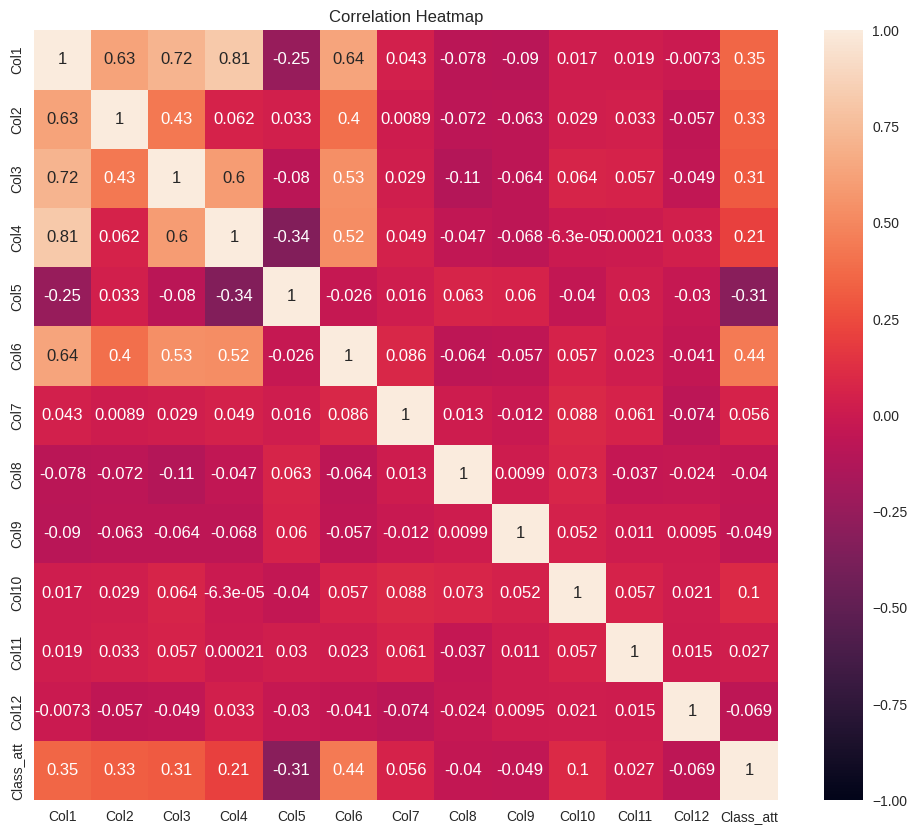

In [13]:
corr = df.corr()

plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.show()

#### Splitting/Scaling

In [9]:
scaler = StandardScaler()

df.loc[:, 'Col1':'Col12'] = scaler.fit_transform(df.loc[:, 'Col1':'Col12'])

In [10]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059,0.951628,-1.015066,0.434293,1.167129,-1.196587,1.712368,1
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556,-0.202552,-0.977816,1.316291,1.679551,-0.940325,-0.913941,1
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421,0.006693,0.639127,1.302680,1.635969,-1.227178,-0.615686,1
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288,-0.363214,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,1
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246668,1.643094,0.851472,-1.059666,-0.190502,-0.069858,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491,-1.202961,-1.562606,0.496104,-1.182667,-0.137294,-1.351275,0
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503,-1.489759,-0.246123,1.512183,-1.677586,1.644047,1.746585,0
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488,-1.373552,-0.593083,0.144949,-1.051583,1.443374,-0.693032,0
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548,-1.099545,-0.763798,0.892189,-0.752649,1.623849,0.773765,0


In [11]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=200)
df_train

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
44,-0.259545,-0.124588,0.558426,-0.240387,-0.293139,-0.763296,-1.402182,0.410351,-0.244536,0.772363,-1.309424,-0.304838,1
109,0.471642,-0.246251,0.598343,0.789239,0.414453,0.352050,-0.783766,0.665827,1.370737,-1.644785,-0.559578,-0.817830,1
39,-0.469371,0.146989,-0.866885,-0.712312,-0.102354,-0.656081,-1.450531,1.008359,1.722570,1.631933,-1.005706,1.306280,1
169,-0.943893,-1.645461,-0.752043,0.014816,-1.477642,-0.063631,-1.023797,-1.315930,-0.187675,-0.759870,0.643796,-0.007282,1
299,1.302173,1.236097,0.341156,0.750472,-0.542401,-0.539153,1.241273,-1.015518,-0.206207,1.621627,-0.139741,0.987169,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.610464,1.998859,1.760201,-0.706466,0.544799,1.106034,0.454634,-1.300685,0.438948,-0.457692,-0.805346,1.260237,1
298,0.349273,0.335748,-1.090657,0.198164,0.825989,-0.660815,1.101454,-0.977781,-0.343734,-0.935097,-0.063185,1.743863,0
272,-1.228329,-1.053981,-0.806027,-0.791437,-0.007664,-0.650498,0.402259,0.905176,-0.956834,1.385000,0.424497,-1.255029,0
105,0.262153,1.006766,-0.053088,-0.414021,-0.100749,-0.514174,1.382088,-1.065718,0.232480,0.007150,-0.547481,-1.521847,1


In [12]:
df_test

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
92,1.444366,-0.169924,1.065515,1.981398,0.488808,1.326028,-1.493173,0.548164,-0.376142,0.852976,0.123039,1.361304,1
284,-0.077231,-0.298241,-0.471373,0.123198,0.234282,-0.625792,0.774297,0.411928,0.494601,-1.352006,-1.605569,-0.856512,0
303,-1.517509,-1.549226,-1.054847,-0.793513,0.780659,-0.791026,0.379180,-1.071723,1.049132,-1.636905,-1.419130,0.376551,0
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106,0.246668,1.643094,0.851472,-1.059666,-0.190502,-0.069858,1
210,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,-0.488288,-0.268519,1.563864,-0.083763,1.148186,-1.210957,-0.728580,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1.045697,0.464261,0.435598,0.996617,0.045854,0.028975,-1.627942,-1.594906,-0.115140,-1.349825,-0.654147,0.618307,1
145,1.461304,2.516607,1.447828,0.000057,-0.960943,0.442438,1.301373,-0.509459,-1.488885,1.089451,1.064796,-1.363964,1
88,-0.226100,-0.074320,-0.536108,-0.234920,0.705020,-0.060752,1.122191,-0.205893,-1.262913,1.547383,-1.739677,0.572982,1
19,-1.090535,-0.529289,-1.177295,-1.005709,-0.100403,-0.734461,-0.015608,0.839174,-0.177010,0.783351,-0.519374,0.707374,1


#### Model Selection

In [14]:
pycaret.classification.setup(df_train, target='Class_att')

,Description,Value
0,Session id,2563
1,Target,Class_att
2,Target type,Binary
3,Original data shape,"(217, 13)"
4,Transformed data shape,"(217, 13)"
5,Transformed train set shape,"(151, 13)"
6,Transformed test set shape,"(66, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [15]:
best_model = pycaret.classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8092,0.8917,0.8682,0.8637,0.8606,0.5556,0.5771,0.2700
qda,Quadratic Discriminant Analysis,0.8092,0.8539,0.8382,0.8864,0.8542,0.5629,0.5805,0.0310
ridge,Ridge Classifier,0.8029,0.8775,0.8782,0.8446,0.8564,0.5330,0.5497,0.0230
gbc,Gradient Boosting Classifier,0.8021,0.8826,0.8845,0.8388,0.8578,0.5256,0.5448,0.1090
lda,Linear Discriminant Analysis,0.7833,0.8775,0.8491,0.8395,0.8383,0.4966,0.5105,0.0380
et,Extra Trees Classifier,0.7833,0.8748,0.8664,0.8276,0.8391,0.4846,0.5130,0.1110
nb,Naive Bayes,0.7829,0.8690,0.7600,0.9108,0.8186,0.5475,0.5740,0.0260
knn,K Neighbors Classifier,0.7767,0.8320,0.8473,0.8369,0.8335,0.4666,0.4931,0.0390
rf,Random Forest Classifier,0.7633,0.8938,0.8391,0.8218,0.8228,0.4521,0.4743,0.1380
ada,Ada Boost Classifier,0.7633,0.8405,0.8382,0.8257,0.8263,0.4455,0.4695,0.0870


In [16]:
y_train = df_train['Class_att'].copy()
X_train = df_train.drop('Class_att', axis=1).copy()

y_test = df_test['Class_att'].copy()
X_test = df_test.drop('Class_att', axis=1).copy()

In [17]:
best_model.score(X_test, y_test)

0.8387096774193549

#### Custom Model

In [18]:
from sklearn.linear_model import LogisticRegressionCV

In [20]:
model = LogisticRegressionCV()
model.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [21]:
model.score(X_test, y_test)

0.8817204301075269

#### Confusion Matrix

In [23]:
y_true = np.array(y_test)
y_pred = model.predict(X_test)

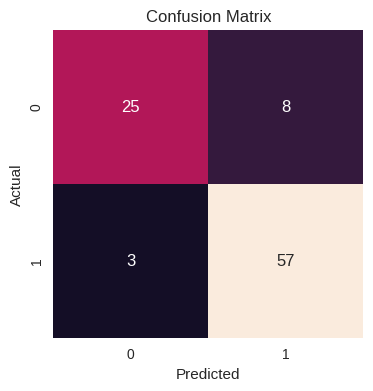

In [24]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82        33
           1       0.88      0.95      0.91        60

    accuracy                           0.88        93
   macro avg       0.88      0.85      0.87        93
weighted avg       0.88      0.88      0.88        93

